In [217]:
import numpy as np
import pandas as pd
import matplotlib as mp
import requests
from bs4 import BeautifulSoup
import json

In [192]:
url = 'https://stats.espncricinfo.com/ci/engine/stats/index.html?class=6;filter=advanced;orderby=runs;size=200;template=results;trophy=117;type=batting'

In [218]:

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36",
    "Referer": "https://www.espncricinfo.com/",
}
response = requests.get(url, headers=headers)
html_content = response.text

In [286]:
def extract_batting_data(html_content):
    soup = BeautifulSoup(html_content, "html.parser")

    tables = soup.select("table.engineTable")


    my_table = tables[2]

    # Get all rows from the tbody (third child of table)
    rows = my_table.find_all("tr")[1:]  # Skipping header row
    batting_data = []
    for row in rows:
        cols = row.find_all("td")
        if len(cols) < 10:
            continue  # Skip if the row doesn't have enough columns
        
        temp_data = {
            "player": cols[0].text.strip(),
            "span": cols[1].text.strip(),
            "mat": cols[2].text.strip(),
            "runs": cols[5].text.strip(),
            "avg": cols[7].text.strip(),
            "sr": cols[9].text.strip(),
            "fours": cols[13].text.strip(),
            "sixes":cols[14].text.strip(),
        }
        batting_data.append(temp_data)
    return batting_data

In [237]:
def extract_bowling_data(html_content):
    soup = BeautifulSoup(html_content, "html.parser")
    tables = soup.select("table.engineTable")
    if len(tables) < 3:
        return []
    my_table = tables[2]

    rows = my_table.find_all("tr")[1:]
    bowling_data = []
    for row in rows:
        cols = row.find_all("td")
        if len(cols) < 11:
            continue 
        temp_data = {
            "player": cols[0].text.strip().split("\n")[0],
            "span": cols[1].text.strip(),
            "mat": cols[2].text.strip(),
            "wickets": cols[7].text.strip(),
            "econ": cols[10].text.strip(),
        }
        bowling_data.append(temp_data)
    return bowling_data 

In [292]:
data = []
batting_data = []
bowling_data = []
data = [batting_data, bowling_data]

In [ ]:
#this is only for ipl
# #https://stats.espncricinfo.com/ci/engine/stats/index.html?class=6;filter=advanced;orderby=runs;page=1;size=200;template=results;trophy=117;type=batting
for i in range(1,5):
    link = r"https://stats.espncricinfo.com/ci/engine/stats/index.html?class=6;filter=advanced;orderby=runs;page={};size=200;template=results;trophy=117;type=batting"
    r = requests.get(link.format(i), headers=headers)
    html_content = r.text
    parsed_data = extract_batting_data(html_content=html_content)
    batting_data.extend(parsed_data)

In [293]:
#data from all major t20 leagues
#https://stats.espncricinfo.com/ci/engine/stats/index.html?class=6;filter=advanced;orderby=runs;page=1;size=200;template=results;trophy=117;type=batting
for i in range(1,11):
    link = r"https://stats.espncricinfo.com/ci/engine/stats/index.html?class=6;filter=advanced;orderby=runs;page={};size=200;template=results;trophy=117;trophy=120;trophy=142;trophy=158;trophy=159;trophy=167;trophy=205;trophy=52;trophy=730;trophy=748;trophy=765;trophy=865;trophy=89;trophy=942;trophy=985;trophy=987;type=batting"
    r = requests.get(link.format(i), headers=headers)
    html_content = r.text
    parsed_data = extract_batting_data(html_content=html_content)
    batting_data.extend(parsed_data)

In [ ]:
#bowling data only for ipl
#https://stats.espncricinfo.com/ci/engine/stats/index.html?class=6;filter=advanced;orderby=runs;page=1;size=200;template=results;trophy=117;type=batting

for i in range(1,5):
    link = r"https://stats.espncricinfo.com/ci/engine/stats/index.html?class=6;filter=advanced;orderby=wickets;page={};size=200;template=results;trophy=117;type=bowling"
    r = requests.get(link.format(i), headers=headers)
    html_content = r.text
    parsed_data = extract_bowling_data(html_content=html_content)
    bowling_data.extend(parsed_data)

In [270]:
#bowling data for all t20 leagues
# https://stats.espncricinfo.com/ci/engine/stats/index.html?class=6;filter=advanced;orderby=wickets;page=2;size=200;template=results;trophy=117;trophy=120;trophy=142;trophy=158;trophy=159;trophy=167;trophy=205;trophy=52;trophy=730;trophy=748;trophy=765;trophy=865;trophy=89;trophy=942;trophy=985;trophy=987;type=bowling
for i in range(1,11):
    link = r"https://stats.espncricinfo.com/ci/engine/stats/index.html?class=6;filter=advanced;orderby=wickets;page={};size=200;template=results;trophy=117;trophy=120;trophy=142;trophy=158;trophy=159;trophy=167;trophy=205;trophy=52;trophy=730;trophy=748;trophy=765;trophy=865;trophy=89;trophy=942;trophy=985;trophy=987;type=bowling"
    r = requests.get(link.format(i), headers=headers)
    html_content = r.text
    parsed_data = extract_bowling_data(html_content=html_content)
    bowling_data.extend(parsed_data)

In [294]:
print(json.dumps(data[0][:2], indent=4))

[
    {
        "player": "CH Gayle",
        "span": "2007-2022",
        "mat": "356",
        "runs": "11448",
        "avg": "36.92",
        "sr": "143.92",
        "fours": "866",
        "sixes": "839"
    },
    {
        "player": "V Kohli",
        "span": "2007-2024",
        "mat": "308",
        "runs": "9965",
        "avg": "40.50",
        "sr": "132.39",
        "fours": "887",
        "sixes": "325"
    }
]


In [200]:
#print(data[0])
#print(json.dumps(data[0], indent=4))

In [295]:
batting_df = pd.DataFrame.from_dict(data[0])
batting_df

,player,span,mat,runs,avg,sr,fours,sixes
0,CH Gayle,2007-2022,356,11448,36.92,143.92,866,839
1,V Kohli,2007-2024,308,9965,40.50,132.39,887,325
2,KA Pollard,2009-2024,493,9608,29.47,148.70,609,639
3,DA Warner,2009-2025,279,9296,38.25,138.82,937,330
4,RG Sharma,2007-2024,337,8878,30.93,131.91,807,374
...,...,...,...,...,...,...,...,...
1995,Akash Verma,2010-2018,7,63,9.00,86.30,8,0
1996,Akshat Raghuwanshi,2022-2022,7,63,12.60,131.25,7,2
1997,Dhiman Ghosh,2012-2017,15,63,10.50,86.30,2,1
1998,Jagjit Singh,2021-2024,21,63,15.75,153.65,4,4


In [274]:
bowling_df = pd.DataFrame.from_dict(data[1])
bowling_df

,player,span,mat,wickets,econ
0,DJ Bravo,2007-2024,433,496,8.42
1,SP Narine,2011-2024,406,440,6.08
2,Rashid Khan,2016-2025,311,407,6.48
3,AD Russell,2012-2025,388,360,8.73
4,Shakib Al Hasan,2007-2024,308,330,6.88
...,...,...,...,...,...
3195,CA Dry,2024-2024,5,2,7.33
3196,MW Edwards,2018-2021,3,2,9.33
3197,B Evans,2022-2022,2,2,8.14
3198,SG Fadte,2013-2018,8,2,8.63


In [296]:
df = [batting_df, bowling_df]
df

[                  player       span  mat   runs    avg      sr fours sixes
 0               CH Gayle  2007-2022  356  11448  36.92  143.92   866   839
 1                V Kohli  2007-2024  308   9965  40.50  132.39   887   325
 2             KA Pollard  2009-2024  493   9608  29.47  148.70   609   639
 3              DA Warner  2009-2025  279   9296  38.25  138.82   937   330
 4              RG Sharma  2007-2024  337   8878  30.93  131.91   807   374
 ...                  ...        ...  ...    ...    ...     ...   ...   ...
 1995         Akash Verma  2010-2018    7     63   9.00   86.30     8     0
 1996  Akshat Raghuwanshi  2022-2022    7     63  12.60  131.25     7     2
 1997        Dhiman Ghosh  2012-2017   15     63  10.50   86.30     2     1
 1998        Jagjit Singh  2021-2024   21     63  15.75  153.65     4     4
 1999             AS Jain  2007-2010    5     63  12.60  126.00     5     1
 
 [2000 rows x 8 columns],
                player       span  mat  wickets  econ  start

In [297]:
# 1. Handle missing values
for d in df:
    
    d = d.dropna()
# Remove missing rows (or use df.fillna(value) to replace them)
#df[0]
#df[1]

In [298]:
print(df[0].columns)
print(df[1].columns)

Index(['player', 'span', 'mat', 'runs', 'avg', 'sr', 'fours', 'sixes'], dtype='object')
Index(['player', 'span', 'mat', 'wickets', 'econ', 'start_year', 'end_year',
       'career_length'],
      dtype='object')


In [301]:
import pandas as pd

# Assuming 'df' is your DataFrame
d = df[0]  # Create a copy to avoid modifying original data

# Convert numeric columns safely
d["mat"] = pd.to_numeric(d["mat"], errors="coerce").fillna(0).astype(int)
d["runs"] = d["runs"].astype(str).str.replace(",", "", regex=True).replace(["-", "DNB", "NA", ""], "0").astype(int)
d["avg"] = pd.to_numeric(d["avg"], errors="coerce").fillna(0).astype(float)
d["sr"] = pd.to_numeric(d["sr"], errors="coerce").fillna(0).astype(float)
d["fours"] = pd.to_numeric(d["fours"], errors="coerce").fillna(0).astype(int)
d["sixes"] = pd.to_numeric(d["sixes"], errors="coerce").fillna(0).astype(int)

# Convert 'span' into start & end years
d[["start_year", "end_year"]] = d["span"].str.split("-", expand=True).astype(int)
d["career_length"] = d["end_year"] - d["start_year"] + 1

# Display the first few rows
print(d.head())


       player       span  mat   runs    avg      sr  fours  sixes  start_year  \
0    CH Gayle  2007-2022  356  11448  36.92  143.92    866    839        2007   
1     V Kohli  2007-2024  308   9965  40.50  132.39    887    325        2007   
2  KA Pollard  2009-2024  493   9608  29.47  148.70    609    639        2009   
3   DA Warner  2009-2025  279   9296  38.25  138.82    937    330        2009   
4   RG Sharma  2007-2024  337   8878  30.93  131.91    807    374        2007   

   end_year  career_length  
0      2022             16  
1      2024             18  
2      2024             16  
3      2025             17  
4      2024             18  


In [279]:
# Process Bowling Data
d = df[1]  # Access bowling DataFrame

d["mat"] = pd.to_numeric(d["mat"], errors="coerce").fillna(0).astype(int)
d["wickets"] = (
    d["wickets"]
    .astype(str)  # Ensure all values are strings before replacing
    .str.replace(",", "", regex=True)  # Remove commas if present
    .replace(["-", "DNB", "NA", ""], "0")  # Replace non-numeric values with "0"
    .astype(int)  # Convert to integer
)
d["econ"] = pd.to_numeric(d["econ"], errors="coerce").fillna(0).astype(float)

# Convert 'span' into career length
d["start_year"] = d["span"].apply(lambda x: int(x.split("-")[0]) if isinstance(x, str) else 0)
d["end_year"] = d["span"].apply(lambda x: int(x.split("-")[1]) if isinstance(x, str) else 0)
d["career_length"] = d["end_year"] - d["start_year"] + 1

print(d.head())  # Debug output to check changes


            player       span  mat  wickets  econ  start_year  end_year  \
0         DJ Bravo  2007-2024  433      496  8.42        2007      2024   
1        SP Narine  2011-2024  406      440  6.08        2011      2024   
2      Rashid Khan  2016-2025  311      407  6.48        2016      2025   
3       AD Russell  2012-2025  388      360  8.73        2012      2025   
4  Shakib Al Hasan  2007-2024  308      330  6.88        2007      2024   

   career_length  
0             18  
1             14  
2             10  
3             14  
4             18  


In [303]:
from sklearn.preprocessing import MinMaxScaler

# Select batting DataFrame
d = df[0].copy()  # Work on a copy to avoid modifying the original

# Initialize the scaler
scaler = MinMaxScaler()

# Columns to scale (EXCLUDING start_year, end_year, span)
cols_to_scale = ["mat", "runs", "avg", "sr", "career_length", "fours", "sixes"]

# Apply MinMaxScaler only on relevant columns
d[cols_to_scale] = scaler.fit_transform(d[cols_to_scale])

# Print the transformed DataFrame
print(d.head())


       player       span       mat      runs       avg        sr     fours  \
0    CH Gayle  2007-2022  0.721545  1.000000  0.392766  0.466060  0.922258   
1     V Kohli  2007-2024  0.623984  0.869741  0.430851  0.409057  0.944622   
2  KA Pollard  2009-2024  1.000000  0.838384  0.313511  0.489692  0.648562   
3   DA Warner  2009-2025  0.565041  0.810979  0.406915  0.440846  0.997870   
4   RG Sharma  2007-2024  0.682927  0.774264  0.329043  0.406684  0.859425   

      sixes  start_year  end_year  career_length  
0  1.000000        2007      2022       0.833333  
1  0.387366        2007      2024       0.944444  
2  0.761621        2009      2024       0.833333  
3  0.393325        2009      2025       0.888889  
4  0.445769        2007      2024       0.944444  


In [266]:
from sklearn.preprocessing import MinMaxScaler

# Select batting DataFrame
d = df[1].copy()  # Work on a copy to avoid modifying the original

# Initialize the scaler
scaler = MinMaxScaler()

# Columns to scale (EXCLUDING start_year, end_year, span)
cols_to_scale = ["mat", "wickets", "econ", "career_length"]

# Apply MinMaxScaler only on relevant columns
d[cols_to_scale] = scaler.fit_transform(d[cols_to_scale])

# Print the transformed DataFrame
print(d.head())


            player       span       mat   wickets      econ  start_year  \
0         DJ Bravo  2007-2024  0.877301  1.000000  0.597615        2007   
1        SP Narine  2011-2024  0.822086  0.885010  0.248882        2011   
2      Rashid Khan  2016-2025  0.627812  0.817248  0.308495        2016   
3       AD Russell  2012-2025  0.785276  0.720739  0.643815        2012   
4  Shakib Al Hasan  2007-2024  0.621677  0.659138  0.368107        2007   

   end_year  career_length  
0      2024       0.944444  
1      2024       0.722222  
2      2025       0.500000  
3      2025       0.722222  
4      2024       0.944444  


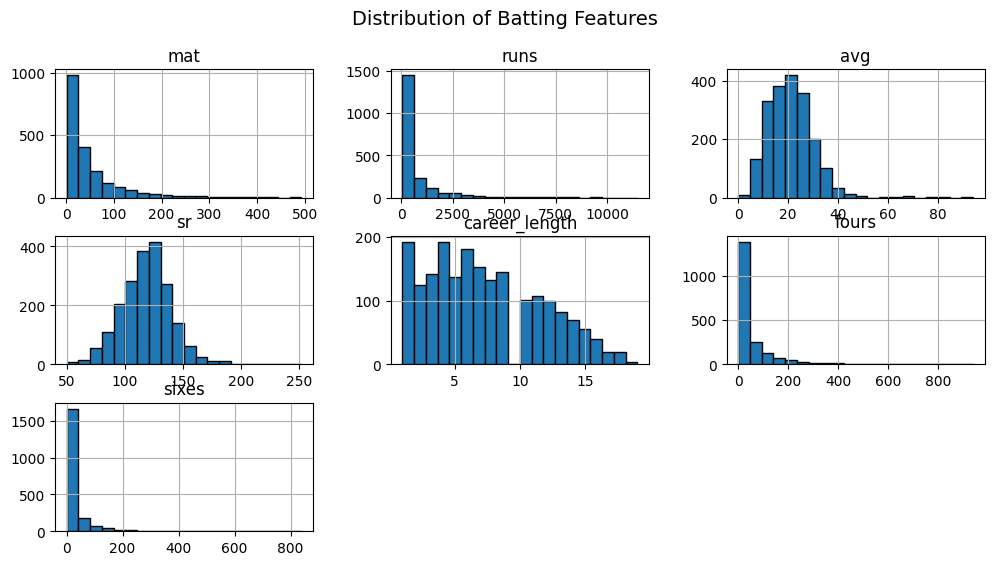

In [304]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define columns for visualization
features = ["mat", "runs", "avg", "sr", "career_length", "fours", "sixes"]
d = df[0].copy()
# Plot histograms
d[features].hist(figsize=(12, 6), bins=20, edgecolor="black")
plt.suptitle("Distribution of Batting Features", fontsize=14)
plt.show()


In [305]:
df[0].to_csv("batting_data.csv", index="False")

In [281]:
df[1].to_csv("bowling_data.csv", index="False")

In [283]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from collections import Counter

# Load dataset
df = pd.read_csv("batting_data.csv")  # Replace with actual dataset path

# Feature Selection & Scaling
features = ["mat", "runs", "avg", "sr", "career_length"]
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Filtering Low-Experience Players
low_experience_threshold = 10  # Players with less than 10 matches
low_experience_players = df[df["mat"] < low_experience_threshold].copy()
high_experience_players = df[df["mat"] >= low_experience_threshold].copy()

# Clustering using K-Means on high-experience players
num_clusters = 4  # Anchor, Balanced, Power Hitter, Finisher
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
high_experience_players.loc[:, "cluster"] = kmeans.fit_predict(X_pca[high_experience_players.index])

# Assign Roles Based on Clusters
role_mapping = {
    0: "Anchor",
    1: "Balanced Player",
    2: "Power Hitter",
    3: "Finisher"
}
high_experience_players.loc[:, "role"] = high_experience_players["cluster"].map(role_mapping)
low_experience_players.loc[:, "role"] = "Low Experience"

# Combine Data Back
df_final = pd.concat([high_experience_players, low_experience_players])

# Supervised Learning - Neural Network
X_final = df_final[features]
y_final = df_final["role"]
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# Check class distribution
print("Class distribution:", Counter(y_train))

# Hyperparameter tuning for Neural Network
nn_params = {
    'hidden_layer_sizes': [(256, 128, 64), (512, 256, 128)],  # Larger networks for better representation
    'activation': ['relu'],  # ReLU for deep networks
    'alpha': [0.0005, 0.001],  # Regularization to reduce overfitting
    'learning_rate_init': [0.005],  # Balanced learning rate
    'max_iter': [1500, 2000]  # More iterations for better convergence
}
nn_model = GridSearchCV(MLPClassifier(random_state=42), nn_params, cv=3)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.best_estimator_.predict(X_test)

# Model Evaluation
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))


Class distribution: Counter({'Finisher': 929, 'Balanced Player': 861, 'Anchor': 648, 'Low Experience': 306, 'Power Hitter': 136})
Neural Network Classification Report:
                 precision    recall  f1-score   support

         Anchor       0.96      0.80      0.87       177
Balanced Player       0.98      0.66      0.79       193
       Finisher       0.71      1.00      0.83       229
 Low Experience       0.99      0.97      0.98        71
   Power Hitter       0.94      0.92      0.93        50

       accuracy                           0.85       720
      macro avg       0.91      0.87      0.88       720
   weighted avg       0.89      0.85      0.85       720



In [284]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from collections import Counter

# Load dataset
df = pd.read_csv("batting_data.csv")  # Updated file name

# Feature Selection & Scaling
features = ["mat", "runs", "avg", "sr", "career_length"]
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Define Inexperienced Batters (less than 100 runs OR less than 10 matches)
inexperienced_players = df[(df["mat"] < 10) | (df["runs"] < 100)].copy()
experienced_players = df[(df["mat"] >= 10) & (df["runs"] >= 100)].copy()

# Clustering using K-Means on experienced players
num_clusters = 4  # Anchor, Balanced, Power Hitter, Finisher
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
experienced_players.loc[:, "cluster"] = kmeans.fit_predict(X_pca[experienced_players.index])

# Assign Roles Based on Clusters
role_mapping = {
    0: "Anchor",
    1: "Balanced Player",
    2: "Power Hitter",
    3: "Finisher"
}
experienced_players.loc[:, "role"] = experienced_players["cluster"].map(role_mapping)
inexperienced_players.loc[:, "role"] = "Inexperienced Batter"

# Combine Data Back
df_final = pd.concat([experienced_players, inexperienced_players])

# Supervised Learning - Neural Network
X_final = df_final[features]
y_final = df_final["role"]
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# Check class distribution
print("Class distribution:", Counter(y_train))

# Hyperparameter tuning for Neural Network
nn_params = {
    'hidden_layer_sizes': [(256, 128, 64), (512, 256, 128)],  # Larger networks for better representation
    'activation': ['relu'],  # ReLU for deep networks
    'alpha': [0.0005, 0.001],  # Regularization to reduce overfitting
    'learning_rate_init': [0.005],  # Balanced learning rate
    'max_iter': [1500, 2000]  # More iterations for better convergence
}
nn_model = GridSearchCV(MLPClassifier(random_state=42), nn_params, cv=3)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.best_estimator_.predict(X_test)

# Model Evaluation
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))


Class distribution: Counter({'Balanced Player': 889, 'Anchor': 767, 'Finisher': 628, 'Inexperienced Batter': 454, 'Power Hitter': 142})
Neural Network Classification Report:
                      precision    recall  f1-score   support

              Anchor       0.98      0.63      0.77       190
     Balanced Player       0.72      0.95      0.82       210
            Finisher       0.87      0.88      0.87       171
Inexperienced Batter       0.95      0.87      0.91        99
        Power Hitter       0.83      1.00      0.91        50

            accuracy                           0.84       720
           macro avg       0.87      0.86      0.85       720
        weighted avg       0.86      0.84      0.84       720



In [368]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, log_loss
import joblib  # For saving the unified model

# ==========================
# 🔹 STEP 1: Load and Preprocess Data
# ==========================
df = pd.read_csv("batting_data.csv")

# Feature Engineering - Adding Boundary Percentage
df["boundary_pct"] = ((4 * df["fours"] + 6 * df["sixes"]) / df["runs"]) * 100

# Feature Selection
features = ["mat", "runs", "avg", "sr", "career_length", "fours", "sixes", "boundary_pct"]
X = df[features].fillna(df[features].mean())  # Handle missing values

# ==========================
# 🔹 STEP 2: Apply Adjustable Feature Weights
# ==========================
def apply_feature_weights(X, role_type):
    weights = {
        "Anchor":        {"runs": 1.5, "avg": 1.3, "sr": 1.2, "fours": 1.0, "sixes": 1.0, "boundary_pct": 0.6},
        "Balanced":      {"runs": 1.0, "avg": 1.0, "sr": 1.0, "fours": 0.8, "sixes": 0.8, "boundary_pct": 1.0},
        "Power Hitter":  {"runs": 0.2, "avg": 0.4, "sr": 1.8, "fours": 2.0, "sixes": 2.0, "boundary_pct": 2.5},
        "Finisher":      {"runs": 0.4, "avg": 0.3, "sr": 1.6, "fours": 2.1, "sixes": 2.2, "boundary_pct": 2.0}
    }
    
    weighted_X = X.copy()
    for feature, weight in weights[role_type].items():
        if feature in weighted_X.columns:
            weighted_X[feature] *= weight
    
    return weighted_X

# ==========================
# 🔹 STEP 3: Role Assignment Logic
# ==========================
# Inexperienced Players (Less than 10 matches or 100 runs)
inexperienced_players = df[(df["mat"] < 20) | (df["runs"] < 500)].copy()
experienced_players = df[(df["mat"] >= 20) & (df["runs"] >= 500)].copy()

# K-Means for Inexperienced Players
X_inexperienced = apply_feature_weights(X.loc[inexperienced_players.index], "Balanced")
kmeans_inexperienced = KMeans(n_clusters=2, random_state=42, n_init=10)
inexperienced_players.loc[:, "role"] = kmeans_inexperienced.fit_predict(X_inexperienced)

inexperienced_players["role"] = inexperienced_players["role"].map({
    0: "Inexperienced - Potential Anchor",
    1: "Inexperienced - Potential Hitter"
})

# Power Hitter Identification (Rule-Based)
X_experienced_power = apply_feature_weights(X.loc[experienced_players.index], "Power Hitter")
power_hitter_criteria = (
    (experienced_players["boundary_pct"] > 60) &
    (experienced_players["sr"] > 135)
)
experienced_players.loc[power_hitter_criteria, "role"] = "Power Hitter"

# Finisher Identification (Rule-Based)
finisher_criteria = (
    (experienced_players["sr"] > 160) &
    ((experienced_players["fours"] + experienced_players["sixes"]) > 40)
)
experienced_players.loc[finisher_criteria, "role"] = "Finisher"

# GMM for Remaining Experienced Players
non_power_hitters = experienced_players[experienced_players["role"].isna()]
X_experienced_gmm = apply_feature_weights(X.loc[non_power_hitters.index], "Balanced")

gmm = GaussianMixture(n_components=4, covariance_type='diag', random_state=42)
non_power_hitters.loc[:, "GMM_Cluster"] = gmm.fit_predict(X_experienced_gmm)

# GMM Role Mapping (✅ Correct Role Mapping Applied)
role_mapping = {
    0: "Anchor",
    1: "Balanced Player",
    2: "Power Hitter",
    3: "Finisher"
}
non_power_hitters.loc[:, "role"] = non_power_hitters["GMM_Cluster"].map(role_mapping)

# Combine Experienced Data Back
experienced_players.update(non_power_hitters)

# Final Combined Dataset
df_final = pd.concat([experienced_players, inexperienced_players])

# ==========================
# 🔹 STEP 4: Supervised Learning (MLP Classifier)
# ==========================
X_final = df_final[features]
y_final = df_final["role"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42
)

# Neural Network with Hyperparameter Tuning
nn_params = {
    'hidden_layer_sizes': [(256, 128, 64), (512, 256, 128)],
    'activation': ['relu'],
    'alpha': [0.0005, 0.001],
    'learning_rate_init': [0.005],
    'max_iter': [1500, 2000]
}
nn_model = GridSearchCV(MLPClassifier(random_state=42), nn_params, cv=3)
nn_model.fit(X_train, y_train)

# Predictions
y_pred_nn = nn_model.best_estimator_.predict(X_test)
y_pred_proba = nn_model.best_estimator_.predict_proba(X_test)

# ==========================
# 🔹 STEP 5: Evaluation
# ==========================
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))
print(f"Log Loss: {log_loss(y_test, y_pred_proba):.4f}")

# ==========================
# 🔹 STEP 6: Unified Pipeline for Deployment
# ==========================
full_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3)),
    ('mlp_classifier', nn_model.best_estimator_)
])

# Saving the Unified Pipeline
joblib.dump(full_pipeline, "unified_pipeline_model.pkl")

print("✅ Unified pipeline model saved successfully!")


C:\Users\praty\AppData\Local\Temp\ipykernel_14980\31104345.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_power_hitters.loc[:, "GMM_Cluster"] = gmm.fit_predict(X_experienced_gmm)


Neural Network Classification Report:
                                  precision    recall  f1-score   support

                          Anchor       0.87      0.82      0.85        50
                 Balanced Player       0.78      1.00      0.88        18
                        Finisher       0.80      0.90      0.85        40
Inexperienced - Potential Anchor       0.92      0.94      0.93        65
Inexperienced - Potential Hitter       0.98      0.99      0.99       195
                    Power Hitter       0.86      0.56      0.68        32

                        accuracy                           0.92       400
                       macro avg       0.87      0.87      0.86       400
                    weighted avg       0.92      0.92      0.92       400

Log Loss: 0.1874
✅ Unified pipeline model saved successfully!


In [361]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import joblib

# Ensure the pipeline is fitted before saving
full_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3)),
    ('mlp_classifier', MLPClassifier(random_state=42, max_iter=1500))
])

full_pipeline.fit(X_train, y_train)  # FITTING STEP
joblib.dump(full_pipeline, "unified_pipeline_model.pkl")


['unified_pipeline_model.pkl']

In [362]:

# Load the saved model
model = joblib.load("unified_pipeline_model.pkl")


In [363]:
test_data = pd.DataFrame({
    "mat": [100, 90, 85, 8, 150],    # Edge cases: few matches, very experienced
    "runs": [450, 3800, 5000, 200, 3000],  # Varied run counts
    "avg": [18, 40, 20, 45, 25],   # Include some extreme averages
    "sr": [130, 110, 110, 120, 180],  # Slow, balanced, aggressive
    "career_length": [8, 9, 10, 2, 12],  # Experience spread
    "fours": [15, 230, 300, 25, 300],  # Boundary heavy or balanced
    "sixes": [8, 105, 70, 10, 200]   # Six-hitters, conservative players
})
# Ensure 'boundary_pct' is calculated in test data
test_data["boundary_pct"] = (
    (test_data["fours"] * 4 + test_data["sixes"] * 6) / test_data["runs"]
).fillna(0)  # Fill missing or zero runs with 0 to avoid NaN


In [364]:
predicted_roles = model.predict(test_data)
print("Predicted Roles:", predicted_roles)


Predicted Roles: ['Anchor' 'Finisher' 'Finisher' 'Inexperienced - Potential Anchor'
 'Finisher']
